In [2]:
import pandas as pd

# Replace 'data_full.csv' with the actual path to your CSV file if it's not in the current working directory.
df = pd.read_csv('data_full.csv')

# Now 'df' contains your data as a DataFrame.
df.columns, len(df)

(Index(['ID mosta', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
        '2019', '2020', '2021', '2022', '2023', 'Okres', 'Longitude',
        'Latitude', 'Material', 'Názov mosta', 'Dĺžka premostenia',
        'Rok postavenia', 'Volná šírka mosta', 'Normána zaťažiteľnost',
        'Trieda PK', 'Druh konštrukcie', 'Kraj', 'n_2012', 'n_2013', 'n_2014',
        'n_2015', 'n_2016', 'n_2017', 'n_2018', 'n_2019', 'n_2020', 'n_2021',
        'n_2022', 'n_2023'],
       dtype='object'),
 8502)

In [3]:
year_list = [f'n_{i}' for i in range(2012, 2024)]
year_counts = {}

for year in year_list:
    condition_counts = df[year].value_counts()
    non_zero_count = condition_counts[condition_counts.index != 0].sum()
    year_counts[year] = non_zero_count

print(year_counts)


{'n_2012': 7657, 'n_2013': 7650, 'n_2014': 7639, 'n_2015': 7633, 'n_2016': 7660, 'n_2017': 7680, 'n_2018': 7706, 'n_2019': 7779, 'n_2020': 7798, 'n_2021': 7809, 'n_2022': 8080, 'n_2023': 8125}


#### Changing data type of some columns

In [4]:
# Filter out rows with "Nezistený" in the "Rok postavenia" and 'Dĺžka premostenia' column
df = df[df["Rok postavenia"] != "Nezistený"]
df = df[df['Dĺžka premostenia'] != "Nezistený"]

# Change the data type of "Dĺžka premostenia" column to float
df['Dĺžka premostenia'] = df['Dĺžka premostenia'].astype(float)

# Change the data type of "Rok postavenia" column to float
df['Rok postavenia'] = df['Rok postavenia'].astype(float)

# Change the data type of "Rok postavenia" column to integer
df['Rok postavenia'] = df['Rok postavenia'].astype(int)


In [5]:
len(df)

8259

In [6]:
year_list = [f'n_{i}' for i in range(2012, 2024)]
nested_dict = {}

for year in year_list:
    condition_counts = df[year].value_counts().to_dict()
    
    # Count of classified bridges (non-zero conditions)
    classified_count = condition_counts.get(0, 0)
    
    # Remove the count of classified bridges from the condition_counts dictionary
    del condition_counts[0]
    
    # Store the results in the nested dictionary
    nested_dict[year] = {
        'classified_bridges': len(df) - classified_count,
        'condition_counts': condition_counts
    }
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(nested_dict)


{   'n_2012': {   'classified_bridges': 7487,
                  'condition_counts': {   1: 487,
                                          2: 822,
                                          3: 3396,
                                          4: 2143,
                                          5: 474,
                                          6: 153,
                                          7: 12}},
    'n_2013': {   'classified_bridges': 7487,
                  'condition_counts': {   1: 492,
                                          2: 822,
                                          3: 3374,
                                          4: 2144,
                                          5: 480,
                                          6: 163,
                                          7: 12}},
    'n_2014': {   'classified_bridges': 7497,
                  'condition_counts': {   1: 500,
                                          2: 787,
                                          3: 3295,
     

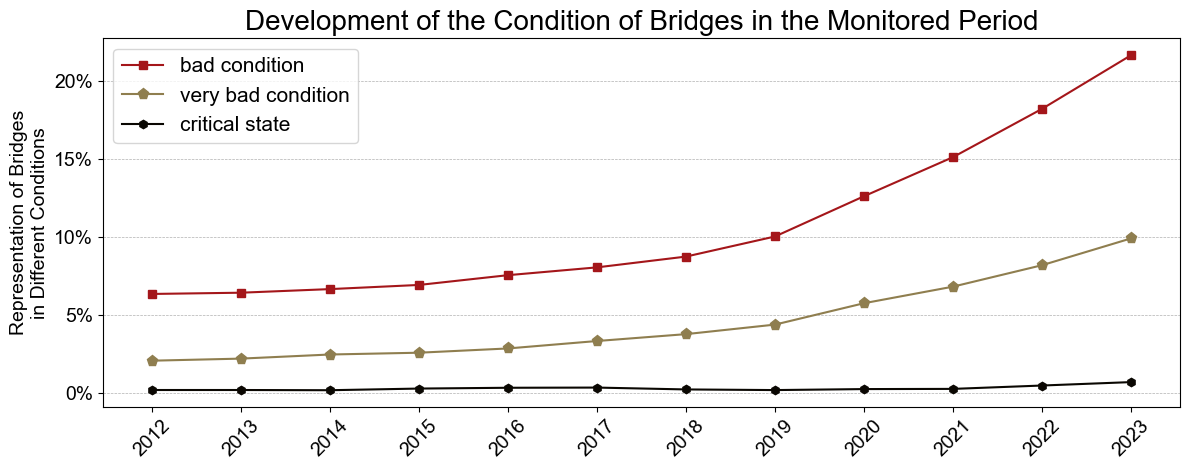

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import matplotlib.ticker as mtick  # Import the ticker module
import matplotlib.font_manager as fm  # Import the font_manager module
import matplotlib as mpl

# Set the default font for Matplotlib
mpl.rcParams['font.family'] = 'Arial'

language = "en"

# Initialize lists to store percentages for each category
category_5_percentages = []
category_6_percentages = []
category_7_percentages = []

# Extract and calculate percentages for each year
for year, data in nested_dict.items():
    total_classified_bridges = data['classified_bridges']
    category_5_count = data['condition_counts'].get(5, 0)
    category_6_count = data['condition_counts'].get(6, 0)
    category_7_count = data['condition_counts'].get(7, 0)
    
    # Calculate percentages and append to the respective lists
    category_5_percent = (category_5_count / total_classified_bridges) * 100
    category_6_percent = (category_6_count / total_classified_bridges) * 100
    category_7_percent = (category_7_count / total_classified_bridges) * 100
    
    category_5_percentages.append(category_5_percent)
    category_6_percentages.append(category_6_percent)
    category_7_percentages.append(category_7_percent)

# List of years for the x-axis
years = [int(year.split('_')[1]) for year in nested_dict.keys()]

# Create a figure with two Y-axes
h_ = 12
b_ = (h_/10)*4
fig, ax1 = plt.subplots(figsize=(h_, b_))

if language == "en":
    con_5 = "bad condition"
    con_6 = "very bad condition"
    con_7 = "critical state"
    title = "Development of the Condition of Bridges in the Monitored Period"
    ylabel = "Representation of Bridges\nin Different Conditions"
else:
    con_5 = "zlý stav"
    con_6 = "veľmi zlý stav"
    con_7 = "havarijný stav"
    title = "Vývoj STS mostov v sledovanom období"
    ylabel = "Percentuálne zastúpenie\nmostov v danej kategórii"

plt.plot(years, category_5_percentages, label=con_5, marker='s', color='#A4161A')
plt.plot(years, category_6_percentages, label=con_6, marker='p', markersize=8, color='#8F7E4F')
plt.plot(years, category_7_percentages, label=con_7, marker='h', color='#0A0702')



# Increase font size for various text elements
plt.title(title, fontsize=20)  # Adjust the fontsize as needed
# plt.title('Mosty v STS 5, 6, a 7 v priebehu rokov', fontsize=20)  # Adjust the fontsize as needed
plt.xticks(years, fontsize=14, rotation=45)  # Rotate x tick labels by given degrees
plt.yticks(fontsize=14)  # Adjust the fontsize as needed

# Add a ylabel
plt.ylabel(ylabel, fontsize=14)

# Remove vertical gridlines
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)  # Remove vertical gridlines

# Use FuncFormatter to format y-axis tick labels as integers
def format_percent(x, pos):
    return f'{int(x)}%'

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(format_percent))

# Move the legend to the bottom of the plot
plt.legend(fontsize=15)  # Adjust the position and number of columns as needed

# Adjust spacing between subplots
plt.tight_layout()

# Save the plot as an SVG file
plt.savefig(f'bridges_conditions_{language}.svg')

# Show plot
plt.show()


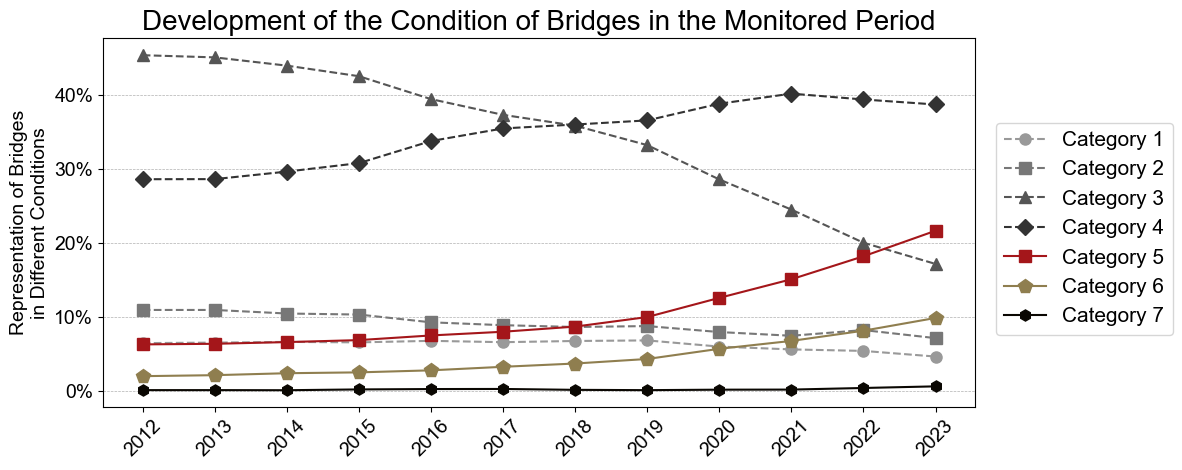

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import matplotlib.ticker as mtick
import matplotlib.font_manager as fm
import matplotlib as mpl

# Set the default font for Matplotlib
mpl.rcParams['font.family'] = 'Arial'

language = "en"

# Initialize lists to store percentages for each category
category_percentages = {i: [] for i in range(1, 8)}

# Extract and calculate percentages for each year and each category
for year, data in nested_dict.items():
    total_classified_bridges = data['classified_bridges']
    for category in range(1, 8):
        category_count = data['condition_counts'].get(category, 0)
        category_percent = (category_count / total_classified_bridges) * 100
        category_percentages[category].append(category_percent)

# List of years for the x-axis
years = [int(year.split('_')[1]) for year in nested_dict.keys()]

# Create a figure with two Y-axes
h_ = 12
b_ = (h_/10)*4
fig, ax1 = plt.subplots(figsize=(h_, b_))

categories = ["Category 1", "Category 2", "Category 3", "Category 4", "Category 5", "Category 6", "Category 7"]

if language == "en":
    title = "Development of the Condition of Bridges in the Monitored Period"
    ylabel = "Representation of Bridges\nin Different Conditions"
else:
    title = "Vývoj STS mostov v sledovanom období"
    ylabel = "Percentuálne zastúpenie\nmostov v danej kategórii"

# Define custom markers, marker sizes, line colors, and line types for each category
markers = ['o', 's', '^', 'D', 's', 'p', 'h']
marker_sizes = [8, 8, 8, 8, 8, 10, 8]
line_colors = ['#999999', '#777777', '#555555', '#333333', '#A4161A', '#8F7E4F', '#0A0702']
line_styles = ['--', '--', '--', '--', '-', '-', '-']

for category in range(1, 8):
    plt.plot(years, category_percentages[category], label=categories[category-1],
             marker=markers[category-1], markersize=marker_sizes[category-1],
             color=line_colors[category-1], linestyle=line_styles[category-1])

# Increase font size for various text elements
plt.title(title, fontsize=20)
plt.xticks(years, fontsize=14, rotation=45)
plt.yticks(fontsize=14)

# Add a ylabel
plt.ylabel(ylabel, fontsize=14)

# Remove vertical gridlines
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

# Use FuncFormatter to format y-axis tick labels as integers
def format_percent(x, pos):
    return f'{int(x)}%'

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(format_percent))

# Move the legend to the bottom of the plot and arrange it in one row
plt.legend(fontsize=15, loc=9, ncol=1, bbox_to_anchor=(1.125, .8))


# Adjust spacing between subplots
plt.tight_layout()


# Save the plot as an SVG file
plt.savefig(f'bridges_conditions_{language}_2.svg')

# Show plot
plt.show()


### Doplnenie


In [9]:
# Define the key-value mapping for "production"
production_mapping = {
    "monolitický železobetón": "cast-in-place",
    "prefabrikovaný železobetón": "precast",
    "prefabrikovaný predpätý betón": "precast",
    "monolitický predpätý betón": "cast-in-place",
    "monolitický prostý betón": "cast-in-place",
    "spriahnutá betón-betón": "cast-in-place",
    "spriahnutá oceľ-betón": "cast-in-place",
    "oceľobetón": "cast-in-place"
}

# Create a custom function to map "Material" to "production"
def map_material_to_production(material):
    return production_mapping.get(material, "other")

# Apply the custom function to create the "production" column
df['production'] = df['Material'].apply(map_material_to_production)

# Print the DataFrame with the new "production" column
print(df[['Material', 'production']])

                           Material     production
0        prefabrikovaný železobetón        precast
1     prefabrikovaný predpätý betón        precast
2     prefabrikovaný predpätý betón        precast
3           monolitický železobetón  cast-in-place
4        monolitický predpätý betón  cast-in-place
...                             ...            ...
8497     monolitický predpätý betón  cast-in-place
8498     monolitický predpätý betón  cast-in-place
8499                   iný materiál          other
8500                   iný materiál          other
8501                   iný materiál          other

[8259 rows x 2 columns]


In [10]:
# Define the key-value mapping for "concrete"
concrete_mapping = {
    "monolitický železobetón": "reinforced",
    "prefabrikovaný železobetón": "reinforced",
    "prefabrikovaný predpätý betón": "prestressed",
    "monolitický predpätý betón": "prestressed",
    "monolitický prostý betón": "reinforced",
    "spriahnutá betón-betón": "reinforced",
    "spriahnutá oceľ-betón": "reinforced",
    "oceľobetón": "reinforced"
}

# Create a custom function to map "Material" to "concrete"
def map_material_to_concrete(material):
    return concrete_mapping.get(material, "other")

# Apply the custom function to create the "concrete" column
df['concrete'] = df['Material'].apply(map_material_to_concrete)

# Print the DataFrame with the new "concrete" column
print(df[['Material', 'concrete']])


                           Material     concrete
0        prefabrikovaný železobetón   reinforced
1     prefabrikovaný predpätý betón  prestressed
2     prefabrikovaný predpätý betón  prestressed
3           monolitický železobetón   reinforced
4        monolitický predpätý betón  prestressed
...                             ...          ...
8497     monolitický predpätý betón  prestressed
8498     monolitický predpätý betón  prestressed
8499                   iný materiál        other
8500                   iný materiál        other
8501                   iný materiál        other

[8259 rows x 2 columns]


In [11]:
# Drop rows where either 'Dĺžka premostenia' or 'Rok postavenia' is 'Nezistený'
df = df[(df['Dĺžka premostenia'] != 'Nezistený') & (df['Rok postavenia'] != 'Nezistený')]

# Convert values in 'Dĺžka premostenia' to float, errors='coerce' will replace non-numeric values with NaN
df['Dĺžka premostenia'] = pd.to_numeric(df['Dĺžka premostenia'], errors='coerce')

# Convert values in 'Rok postavenia' to float, errors='coerce' will replace non-numeric values with NaN
df['Rok postavenia'] = pd.to_numeric(df['Rok postavenia'], errors='coerce')


# Reset the index of the DataFrame if needed
df.reset_index(drop=True, inplace=True)

### Grafy samostatne

C:\Users\Doktor\AppData\Local\Temp\ipykernel_15352\1354854406.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bridge_counts = filtered_df.groupby(['Construction Year Interval', 'concrete']).size().unstack(fill_value=0)


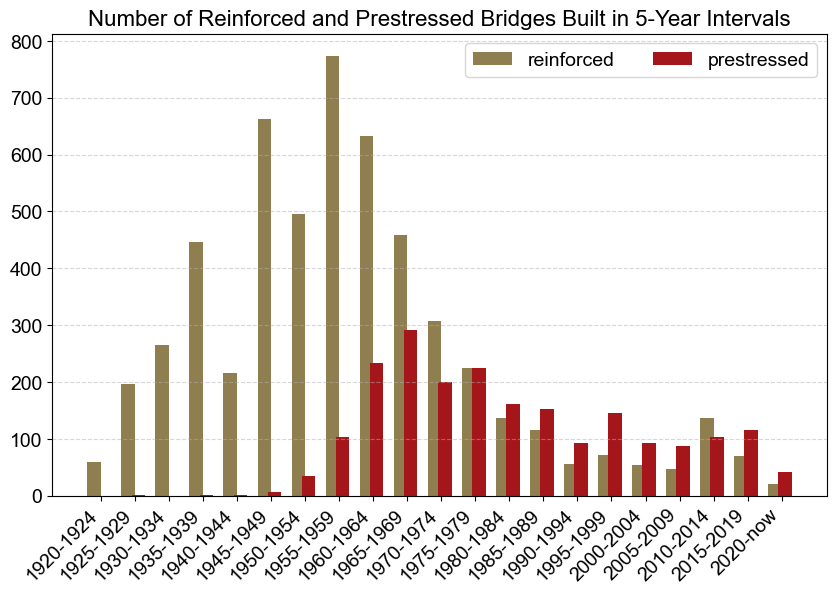

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the bin edges (years) and labels for the 6-year intervals
bin_value = 5
start_year = 1920
bin_edges = list(range(start_year, 2024, bin_value))
if bin_edges[-1] < 2023:
    bin_edges.append(bin_edges[-1] + bin_value)

bin_labels = [f'{start}-{start + (bin_value - 1)}' for start in bin_edges[:-1]]

# Replace the last 4 characters of the last bin_labels item with 4 spaces
bin_labels[-1] = bin_labels[-1][:-4] + 'now'

# Create a new column 'Construction Year Interval' based on the bins
df['Construction Year Interval'] = pd.cut(df['Rok postavenia'], bins=bin_edges, labels=bin_labels)

# Filter the DataFrame to include only "reinforced" and "prestressed" rows
filtered_df = df[df['concrete'].isin(['reinforced', 'prestressed'])]

# Group the filtered DataFrame by 'Construction Year Interval' and 'concrete' and count the number of bridges in each group
bridge_counts = filtered_df.groupby(['Construction Year Interval', 'concrete']).size().unstack(fill_value=0)

# Get the unique construction years for positioning bars side by side
unique_years = bin_labels

# Define the width of each bar cluster
bar_width = 0.4

# Calculate the x-axis positions for bars of each category
x = np.arange(len(unique_years))

# Create a clustered bar plot
fig, ax = plt.subplots(figsize=(10, 6))

bar_reinforced = ax.bar(x - bar_width/2, bridge_counts['reinforced'], width=bar_width, label='reinforced', color='#8F7E4F')
bar_prestressed = ax.bar(x + bar_width/4, bridge_counts['prestressed'], width=bar_width, label='prestressed', color='#A4161A')

# Add labels and a legend
# ax.set_xlabel('Construction Year Interval', fontsize=14)
ax.set_title(f'Number of Reinforced and Prestressed Bridges Built in {bin_value}-Year Intervals', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(unique_years, rotation=45, ha="right", fontsize=14)
ax.legend(fontsize=14, ncols=2)

# Set the font size of y-axis tick labels
ax.yaxis.set_tick_params(labelsize=14)

# Add horizontal gridlines with alpha=0.5
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Save the plot as an SVG file
plt.savefig('podľa_betónu_počet.png')

# Show the plot
plt.show()


C:\Users\Doktor\AppData\Local\Temp\ipykernel_15352\3159747367.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bridge_lengths = filtered_df.groupby(['Construction Year Interval', 'concrete'])['Dĺžka premostenia'].sum().unstack(fill_value=0)


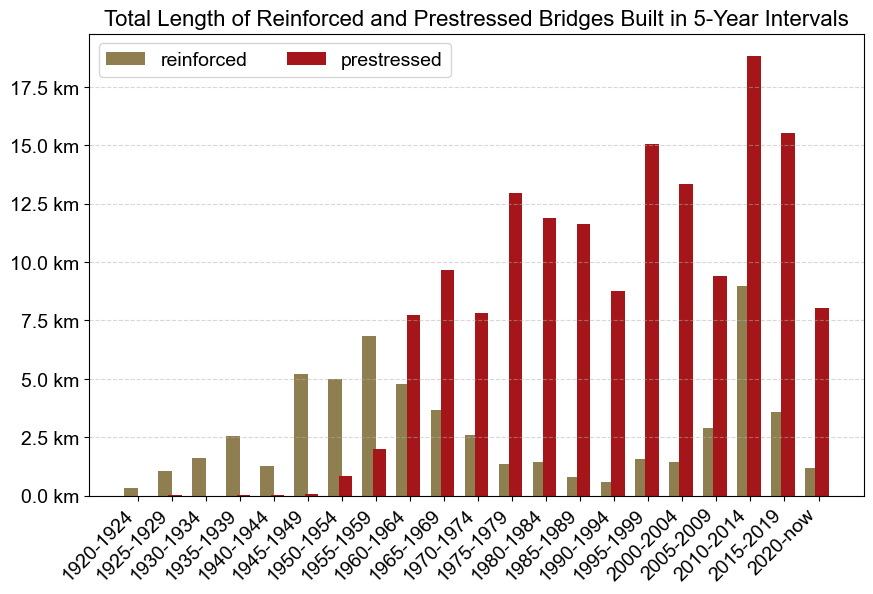

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick


# Create a function to format y-axis ticks in kilometers
def format_kilometers(x, pos):
    return f'{x/1000:.1f} km'

# Define the bin edges (years) and labels for the 5-year intervals
bin_value = 5
start_year = 1920
bin_edges = list(range(start_year, 2024, bin_value))
if bin_edges[-1] < 2023:
    bin_edges.append(bin_edges[-1]+bin_value)

bin_labels = [f'{start}-{start+(bin_value-1)}' for start in bin_edges[:-1]]

# Replace the last 4 characters of the last bin_labels item with 4 spaces
bin_labels[-1] = bin_labels[-1][:-4] + 'now'

# Create a new column 'Construction Year Interval' based on the bins
df['Construction Year Interval'] = pd.cut(df['Rok postavenia'], bins=bin_edges, labels=bin_labels)

# Filter the DataFrame to include only "reinforced" and "prestressed" rows
filtered_df = df[df['concrete'].isin(['reinforced', 'prestressed'])]

# Group the filtered DataFrame by 'Construction Year Interval' and 'concrete' and sum the bridge lengths in each group
bridge_lengths = filtered_df.groupby(['Construction Year Interval', 'concrete'])['Dĺžka premostenia'].sum().unstack(fill_value=0)

# Get the unique construction years for positioning bars side by side
unique_years = bin_labels

# Define the width of each bar cluster
bar_width = 0.4

# Calculate the x-axis positions for bars of each category
x = np.arange(len(unique_years))

# Create a clustered bar plot for total bridge length
fig, ax = plt.subplots(figsize=(10, 6))

bar_reinforced = ax.bar(x - bar_width/2, bridge_lengths['reinforced'], width=bar_width, label='reinforced', color='#8F7E4F')
bar_prestressed = ax.bar(x + bar_width/4, bridge_lengths['prestressed'], width=bar_width, label='prestressed', color='#A4161A')

# Add labels and a legend
# ax.set_xlabel('Construction Year Interval', fontsize=14)
ax.set_title(f'Total Length of Reinforced and Prestressed Bridges Built in {bin_value}-Year Intervals', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(unique_years, rotation=45, ha="right", fontsize=14)

# Set the custom y-axis tick formatter
ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_kilometers))

# Set the font size of y-axis tick labels
ax.yaxis.set_tick_params(labelsize=14)

ax.legend(fontsize=14, ncols=2)

# Add horizontal gridlines with alpha=0.5
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Save the plot as an SVG file
plt.savefig('podľa_betónu_dĺžka.png')

# Show the plot
plt.show()


C:\Users\Doktor\AppData\Local\Temp\ipykernel_15352\3582951144.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bridge_counts = filtered_df.groupby(['Construction Year Interval', 'production']).size().unstack(fill_value=0)


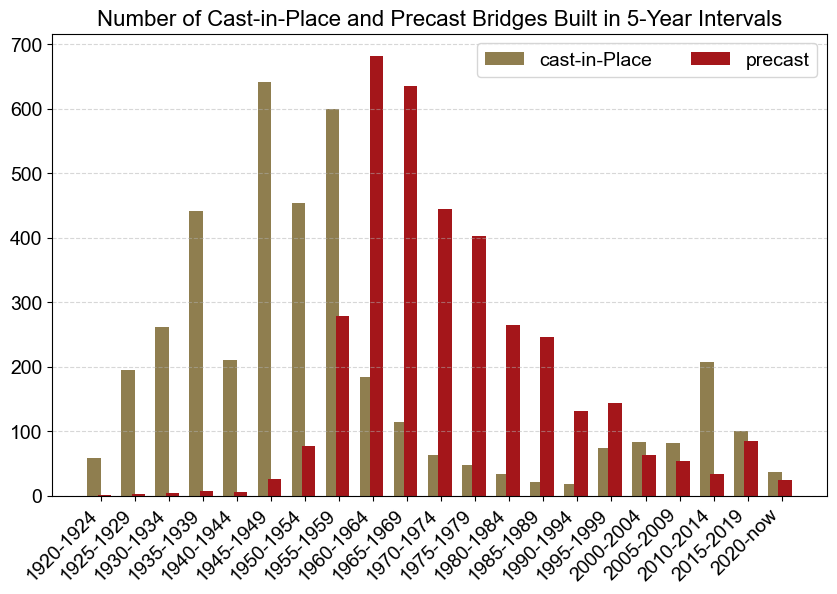

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the bin edges (years) and labels for the 5-year intervals
bin_value = 5
start_year = 1920
bin_edges = list(range(start_year, 2024, bin_value))
if bin_edges[-1] < 2023:
    bin_edges.append(bin_edges[-1] + bin_value)

bin_labels = [f'{start}-{start + (bin_value - 1)}' for start in bin_edges[:-1]]

# Replace the last 4 characters of the last bin_labels item with 4 spaces
bin_labels[-1] = bin_labels[-1][:-4] + 'now'

# Create a new column 'Construction Year Interval' based on the bins
df['Construction Year Interval'] = pd.cut(df['Rok postavenia'], bins=bin_edges, labels=bin_labels)

# Filter the DataFrame to include only "cast-in-place" and "precast" rows in the 'production' column
filtered_df = df[df['production'].isin(['cast-in-place', 'precast'])]

# Group the filtered DataFrame by 'Construction Year Interval' and 'production' and count the number of bridges in each group
bridge_counts = filtered_df.groupby(['Construction Year Interval', 'production']).size().unstack(fill_value=0)

# Get the unique construction years for positioning bars side by side
unique_years = bin_labels

# Define the width of each bar cluster
bar_width = 0.4

# Calculate the x-axis positions for bars of each category
x = np.arange(len(unique_years))

# Create a clustered bar plot
fig, ax = plt.subplots(figsize=(10, 6))

bar_cast_in_place = ax.bar(x - bar_width/2, bridge_counts['cast-in-place'], width=bar_width, label='cast-in-Place', color='#8F7E4F')
bar_precast = ax.bar(x + bar_width/4, bridge_counts['precast'], width=bar_width, label='precast', color='#A4161A')

# Add labels and a legend
# ax.set_xlabel('Construction Year Interval', fontsize=14)
ax.set_title(f'Number of Cast-in-Place and Precast Bridges Built in {bin_value}-Year Intervals', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(unique_years, rotation=45, ha="right", fontsize=14)
ax.legend(fontsize=14, ncols=2)

# Set the font size of y-axis tick labels
ax.yaxis.set_tick_params(labelsize=14)

# Add horizontal gridlines with alpha=0.5
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Save the plot as an SVG file
plt.savefig('podľa_technológie_počet.png')

# Show the plot
plt.show()


C:\Users\Doktor\AppData\Local\Temp\ipykernel_15352\2980795473.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bridge_lengths = filtered_df.groupby(['Construction Year Interval', 'production'])['Dĺžka premostenia'].sum().unstack(fill_value=0)


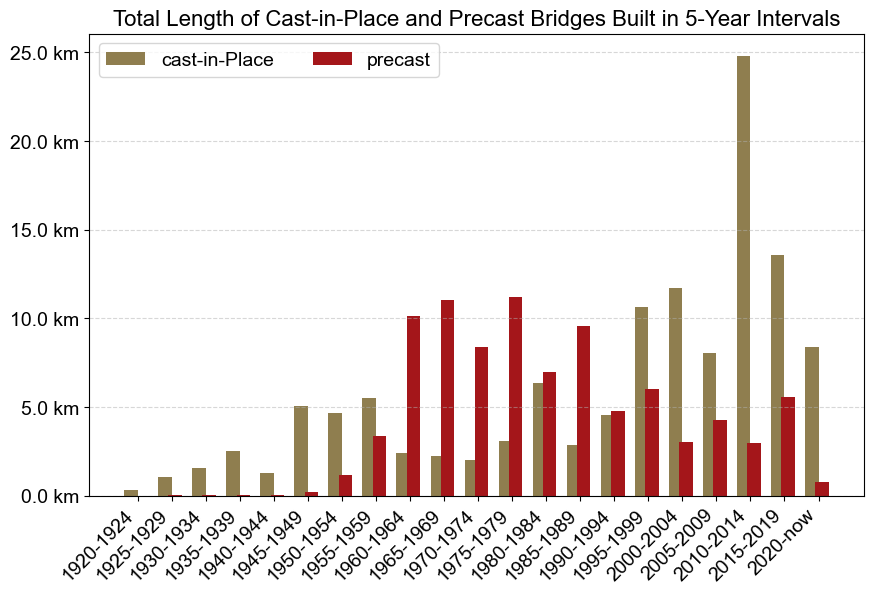

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick


# Create a function to format y-axis ticks in kilometers
def format_kilometers(x, pos):
    return f'{x/1000:.1f} km'

# Define the bin edges (years) and labels for the 5-year intervals
bin_value = 5
start_year = 1920
bin_edges = list(range(start_year, 2024, bin_value))
if bin_edges[-1] < 2023:
    bin_edges.append(bin_edges[-1]+bin_value)

bin_labels = [f'{start}-{start+(bin_value-1)}' for start in bin_edges[:-1]]

# Replace the last 4 characters of the last bin_labels item with 4 spaces
bin_labels[-1] = bin_labels[-1][:-4] + 'now'

# Create a new column 'Construction Year Interval' based on the bins
df['Construction Year Interval'] = pd.cut(df['Rok postavenia'], bins=bin_edges, labels=bin_labels)

# Filter the DataFrame to include only "cast-in-place" and "precast" rows in the 'production' column
filtered_df = df[df['production'].isin(['cast-in-place', 'precast'])]

# Group the filtered DataFrame by 'Construction Year Interval' and 'production' and sum the bridge lengths in each group
bridge_lengths = filtered_df.groupby(['Construction Year Interval', 'production'])['Dĺžka premostenia'].sum().unstack(fill_value=0)

# Get the unique construction years for positioning bars side by side
unique_years = bin_labels

# Define the width of each bar cluster
bar_width = 0.4

# Calculate the x-axis positions for bars of each category
x = np.arange(len(unique_years))

# Create a clustered bar plot for total bridge length
fig, ax = plt.subplots(figsize=(10, 6))

bar_cast_in_place = ax.bar(x - bar_width/2, bridge_lengths['cast-in-place'], width=bar_width, label='cast-in-Place', color='#8F7E4F')
bar_precast = ax.bar(x + bar_width/4, bridge_lengths['precast'], width=bar_width, label='precast', color='#A4161A')

# Add labels and a legend
# ax.set_xlabel('Construction Year Interval', fontsize=14)
ax.set_title(f'Total Length of Cast-in-Place and Precast Bridges Built in {bin_value}-Year Intervals', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(unique_years, rotation=45, ha="right", fontsize=14)

# Set the custom y-axis tick formatter
ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_kilometers))

# Set the font size of y-axis tick labels
ax.yaxis.set_tick_params(labelsize=14)

ax.legend(fontsize=14, ncols=2)

# Add horizontal gridlines with alpha=0.5
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Save the plot as an SVG file
plt.savefig('podľa_technológie_dĺžka.png')

# Show the plot
plt.show()


## Spojene grafy

#### Without Translation - By construction type

C:\Users\Doktor\AppData\Local\Temp\ipykernel_15352\1853216930.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bridge_counts = filtered_df.groupby(['Construction Year Interval', 'concrete']).size().unstack(fill_value=0)
C:\Users\Doktor\AppData\Local\Temp\ipykernel_15352\1853216930.py:63: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bridge_lengths = filtered_df.groupby(['Construction Year Interval', 'concrete'])['Dĺžka premostenia'].sum().unstack(fill_value=0)


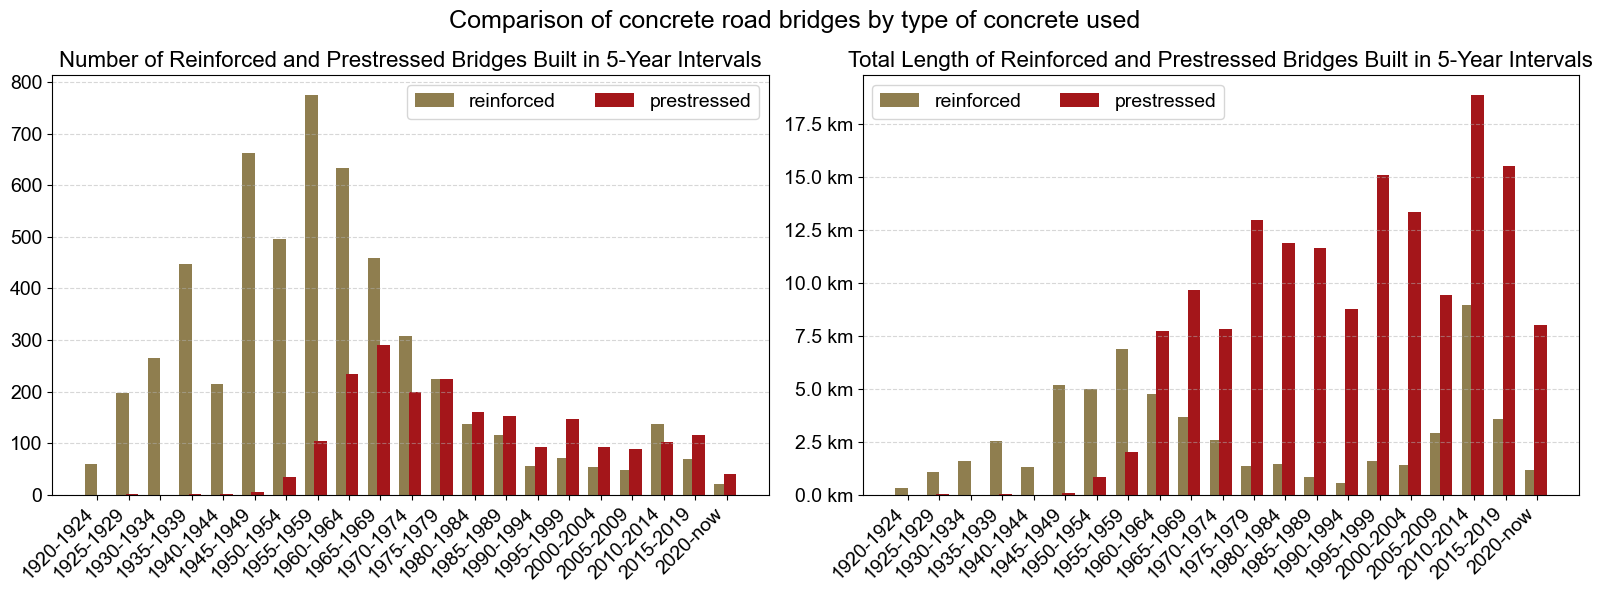

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick

# Create a function to format y-axis ticks in kilometers
def format_kilometers(x, pos):
    return f'{x/1000:.1f} km'

# Define the bin edges (years) and labels for the 6-year intervals
bin_value = 5
start_year = 1920
bin_edges = list(range(start_year, 2024, bin_value))
if bin_edges[-1] < 2023:
    bin_edges.append(bin_edges[-1] + bin_value)

bin_labels = [f'{start}-{start + (bin_value - 1)}' for start in bin_edges[:-1]]

# Replace the last 4 characters of the last bin_labels item with 4 spaces
bin_labels[-1] = bin_labels[-1][:-4] + 'now'

# Create a new column 'Construction Year Interval' based on the bins
df['Construction Year Interval'] = pd.cut(df['Rok postavenia'], bins=bin_edges, labels=bin_labels)

# Filter the DataFrame to include only "reinforced" and "prestressed" rows
filtered_df = df[df['concrete'].isin(['reinforced', 'prestressed'])]

# Group the filtered DataFrame by 'Construction Year Interval' and 'concrete' and count the number of bridges in each group
bridge_counts = filtered_df.groupby(['Construction Year Interval', 'concrete']).size().unstack(fill_value=0)

# Get the unique construction years for positioning bars side by side
unique_years = bin_labels

# Define the width of each bar cluster
bar_width = 0.4

# Calculate the x-axis positions for bars of each category
x = np.arange(len(unique_years))

# Create a clustered bar plot for total bridge length
fig, axs = plt.subplots(1, 2, figsize=(16, 6))  # Create subplots with 1 row and 2 columns

# Plot 1: Number of Bridges
bar_reinforced = axs[0].bar(x - bar_width/2, bridge_counts['reinforced'], width=bar_width, label='reinforced', color='#8F7E4F')
bar_prestressed = axs[0].bar(x + bar_width/4, bridge_counts['prestressed'], width=bar_width, label='prestressed', color='#A4161A')

# Add labels and a legend to Plot 1
axs[0].set_title(f'Number of Reinforced and Prestressed Bridges Built in {bin_value}-Year Intervals', fontsize=16)
axs[0].set_xticks(x)
axs[0].set_xticklabels(unique_years, rotation=45, ha="right", fontsize=14)
axs[0].legend(fontsize=14, ncols=2)
axs[0].yaxis.set_tick_params(labelsize=14)
axs[0].grid(axis='y', linestyle='--', alpha=0.5)


# Create a new column 'Construction Year Interval' based on the bins
df['Construction Year Interval'] = pd.cut(df['Rok postavenia'], bins=bin_edges, labels=bin_labels)

# Filter the DataFrame to include only "reinforced" and "prestressed" rows
filtered_df = df[df['concrete'].isin(['reinforced', 'prestressed'])]

# Group the filtered DataFrame by 'Construction Year Interval' and 'concrete' and sum the bridge lengths in each group
bridge_lengths = filtered_df.groupby(['Construction Year Interval', 'concrete'])['Dĺžka premostenia'].sum().unstack(fill_value=0)

# Get the unique construction years for positioning bars side by side
unique_years = bin_labels

# Define the width of each bar cluster
bar_width = 0.4

# Calculate the x-axis positions for bars of each category
x = np.arange(len(unique_years))

bar_reinforced = axs[1].bar(x - bar_width/2, bridge_lengths['reinforced'], width=bar_width, label='reinforced', color='#8F7E4F')
bar_prestressed = axs[1].bar(x + bar_width/4, bridge_lengths['prestressed'], width=bar_width, label='prestressed', color='#A4161A')

# Add labels and a legend to Plot 2
axs[1].set_title(f'Total Length of Reinforced and Prestressed Bridges Built in {bin_value}-Year Intervals', fontsize=16)
axs[1].set_xticks(x)
axs[1].set_xticklabels(unique_years, rotation=45, ha="right", fontsize=14)
axs[1].legend(fontsize=14, ncols=2)
axs[1].yaxis.set_major_formatter(mtick.FuncFormatter(format_kilometers))
axs[1].yaxis.set_tick_params(labelsize=14)
axs[1].grid(axis='y', linestyle='--', alpha=0.5)

# Add a common title for the subplots
plt.suptitle('Comparison of concrete road bridges by type of concrete used', fontsize=18)

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()


#### With Translation - By concrete type

C:\Users\Doktor\AppData\Local\Temp\ipykernel_15352\1029635656.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bridge_counts = filtered_df.groupby(['Construction Year Interval', 'concrete']).size().unstack(fill_value=0)
C:\Users\Doktor\AppData\Local\Temp\ipykernel_15352\1029635656.py:80: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bridge_lengths = filtered_df.groupby(['Construction Year Interval', 'concrete'])['Dĺžka premostenia'].sum().unstack(fill_value=0)


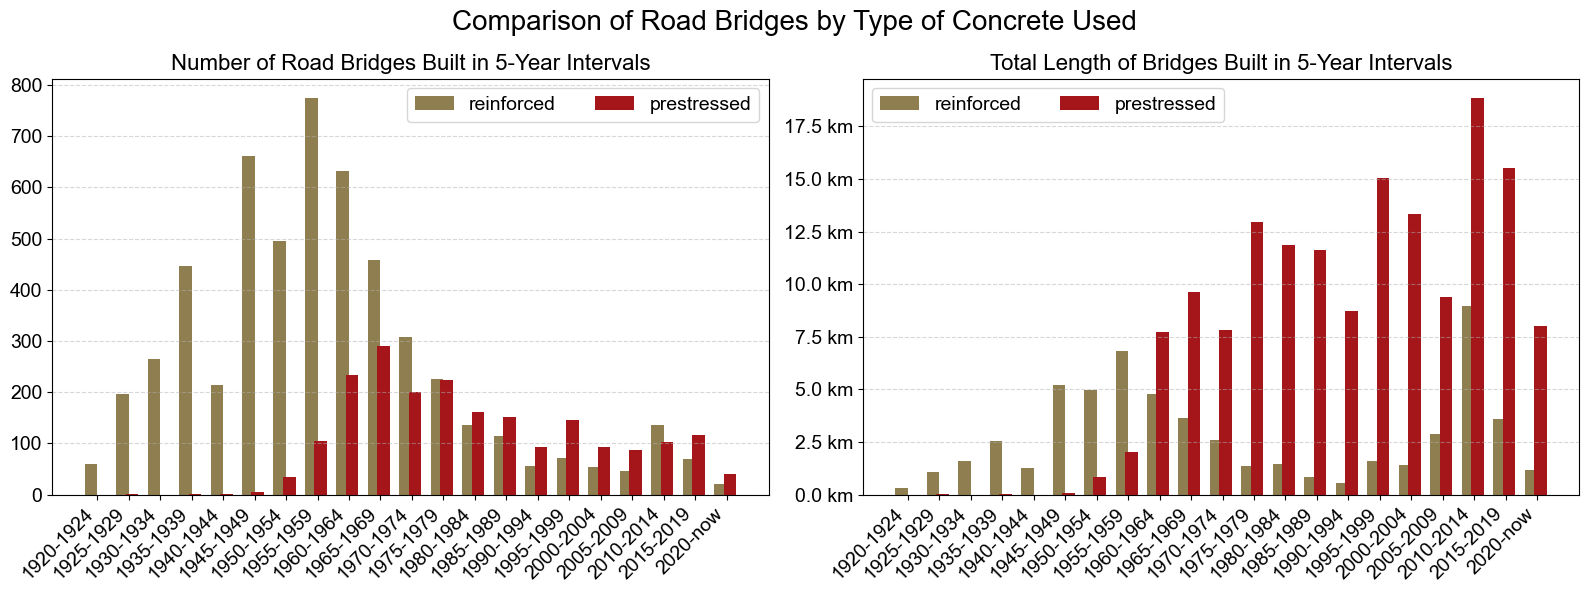

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick

# Set the language variable ("svk" or "en")
language = "en"  # Change this to "en" for English captions

# Create a function to format y-axis ticks in kilometers
def format_kilometers(x, pos):
    return f'{x/1000:.1f} km'

# Define the bin edges (years) and labels for the 6-year intervals
bin_value = 5
start_year = 1920
bin_edges = list(range(start_year, 2024, bin_value))
if bin_edges[-1] < 2023:
    bin_edges.append(bin_edges[-1] + bin_value)

bin_labels = [f'{start}-{start + (bin_value - 1)}' for start in bin_edges[:-1]]

if language == "svk":
    bin_label_append = "súč."
else:
    bin_label_append = "now"

# Replace the last 4 characters of the last bin_labels item with 4 spaces
bin_labels[-1] = bin_labels[-1][:-4] + bin_label_append

# Create a new column 'Construction Year Interval' based on the bins
df['Construction Year Interval'] = pd.cut(df['Rok postavenia'], bins=bin_edges, labels=bin_labels)

# Filter the DataFrame to include only "reinforced" and "prestressed" rows
filtered_df = df[df['concrete'].isin(['reinforced', 'prestressed'])]

# Group the filtered DataFrame by 'Construction Year Interval' and 'concrete' and count the number of bridges in each group
bridge_counts = filtered_df.groupby(['Construction Year Interval', 'concrete']).size().unstack(fill_value=0)

# Get the unique construction years for positioning bars side by side
unique_years = bin_labels

# Define the width of each bar cluster
bar_width = 0.4

# Calculate the x-axis positions for bars of each category
x = np.arange(len(unique_years))

# Create a clustered bar plot for total bridge length
fig, axs = plt.subplots(1, 2, figsize=(16, 6))  # Create subplots with 1 row and 2 columns

if language == "svk":
    label_reinf = "železobetón"
    label_prestress = "predpätý ŽB"
else:
    label_reinf = "reinforced"
    label_prestress = "prestressed"

# Plot 1: Number of Bridges
bar_reinforced = axs[0].bar(x - bar_width/2, bridge_counts['reinforced'], width=bar_width, label=label_reinf, color='#8F7E4F')
bar_prestressed = axs[0].bar(x + bar_width/4, bridge_counts['prestressed'], width=bar_width, label=label_prestress, color='#A4161A')

# Add labels and a legend to Plot 1
if language == "svk":
    axs[0].set_title(f'Počet postavených mostov v {bin_value}-ročných intervaloch', fontsize=16)
else:
    axs[0].set_title(f'Number of Road Bridges Built in {bin_value}-Year Intervals', fontsize=16)
axs[0].set_xticks(x)
axs[0].set_xticklabels(unique_years, rotation=45, ha="right", fontsize=14)
axs[0].legend(fontsize=14, ncols=2)
axs[0].yaxis.set_tick_params(labelsize=14)
axs[0].grid(axis='y', linestyle='--', alpha=0.5)

# Create a new column 'Construction Year Interval' based on the bins
df['Construction Year Interval'] = pd.cut(df['Rok postavenia'], bins=bin_edges, labels=bin_labels)

# Filter the DataFrame to include only "reinforced" and "prestressed" rows
filtered_df = df[df['concrete'].isin(['reinforced', 'prestressed'])]

# Group the filtered DataFrame by 'Construction Year Interval' and 'concrete' and sum the bridge lengths in each group
bridge_lengths = filtered_df.groupby(['Construction Year Interval', 'concrete'])['Dĺžka premostenia'].sum().unstack(fill_value=0)

# Get the unique construction years for positioning bars side by side
unique_years = bin_labels

# Define the width of each bar cluster
bar_width = 0.4

# Calculate the x-axis positions for bars of each category
x = np.arange(len(unique_years))

bar_reinforced = axs[1].bar(x - bar_width/2, bridge_lengths['reinforced'], width=bar_width, label=label_reinf, color='#8F7E4F')
bar_prestressed = axs[1].bar(x + bar_width/4, bridge_lengths['prestressed'], width=bar_width, label=label_prestress, color='#A4161A')

# Add labels and a legend to Plot 2
if language == "svk":
    axs[1].set_title(f'Celková dĺžka postavených mostov v {bin_value}-ročných intervaloch', fontsize=16)
else:
    axs[1].set_title(f'Total Length of Bridges Built in {bin_value}-Year Intervals', fontsize=16)
axs[1].set_xticks(x)
axs[1].set_xticklabels(unique_years, rotation=45, ha="right", fontsize=14)
axs[1].legend(fontsize=14, ncols=2)
axs[1].yaxis.set_major_formatter(mtick.FuncFormatter(format_kilometers))
axs[1].yaxis.set_tick_params(labelsize=14)
axs[1].grid(axis='y', linestyle='--', alpha=0.5)

# Add a common title for the subplots
if language == "svk":
    plt.suptitle('Porovnanie cestných mostov podľa typu použitého betónu', fontsize=20)
else:
    plt.suptitle('Comparison of Road Bridges by Type of Concrete Used', fontsize=20)

# Adjust spacing between subplots
plt.tight_layout()

# Save the plot as an SVG file
plt.savefig(f'by_concrete_type_{language}.svg')

# Show the combined plot
plt.show()


#### Without Translation - By construction type

C:\Users\Doktor\AppData\Local\Temp\ipykernel_15352\2870323097.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bridge_counts = filtered_df.groupby(['Construction Year Interval', 'production']).size().unstack(fill_value=0)
C:\Users\Doktor\AppData\Local\Temp\ipykernel_15352\2870323097.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bridge_lengths = filtered_df.groupby(['Construction Year Interval', 'production'])['Dĺžka premostenia'].sum().unstack(fill_value=0)


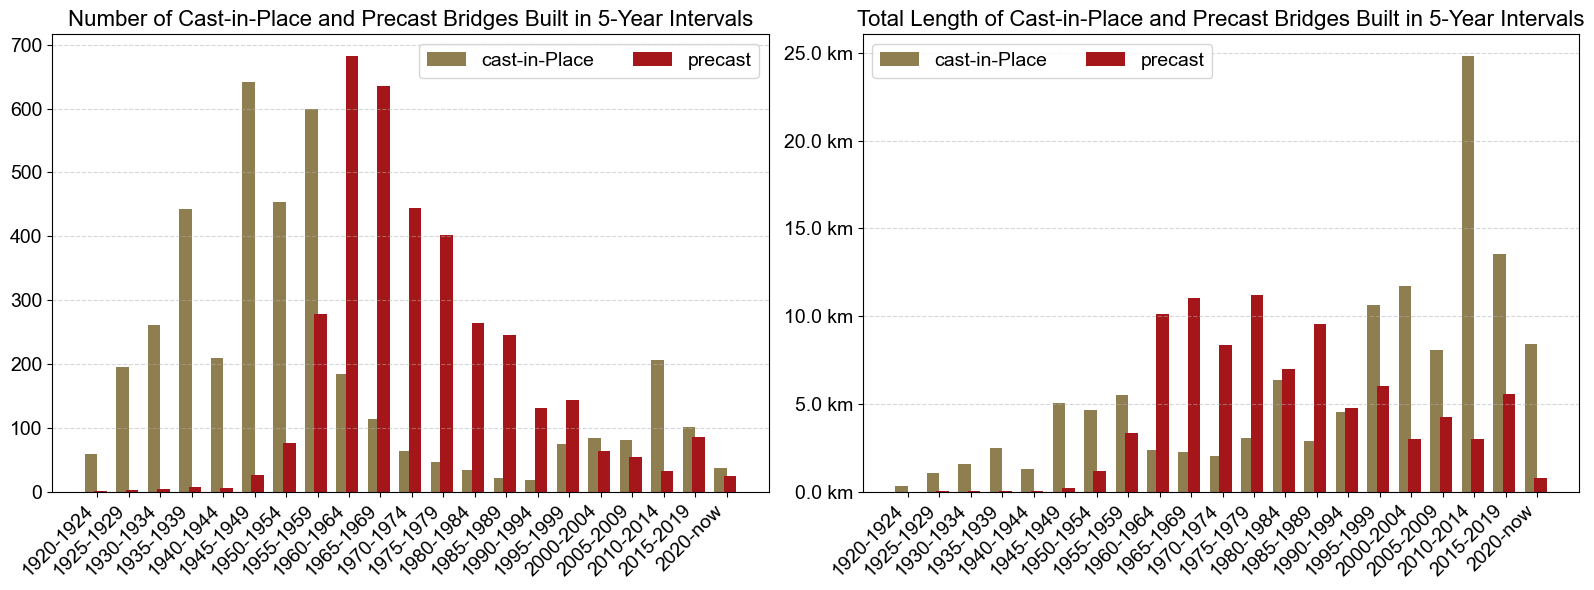

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick

# Define the bin edges (years) and labels for the 5-year intervals
bin_value = 5
start_year = 1920
bin_edges = list(range(start_year, 2024, bin_value))
if bin_edges[-1] < 2023:
    bin_edges.append(bin_edges[-1] + bin_value)

bin_labels = [f'{start}-{start + (bin_value - 1)}' for start in bin_edges[:-1]]

# Replace the last 4 characters of the last bin_labels item with 4 spaces
bin_labels[-1] = bin_labels[-1][:-4] + 'now'

# Create a new column 'Construction Year Interval' based on the bins
df['Construction Year Interval'] = pd.cut(df['Rok postavenia'], bins=bin_edges, labels=bin_labels)

# Filter the DataFrame to include only "cast-in-place" and "precast" rows in the 'production' column
filtered_df = df[df['production'].isin(['cast-in-place', 'precast'])]

# Group the filtered DataFrame by 'Construction Year Interval' and 'production' and count the number of bridges in each group
bridge_counts = filtered_df.groupby(['Construction Year Interval', 'production']).size().unstack(fill_value=0)

# Group the filtered DataFrame by 'Construction Year Interval' and 'production' and sum the bridge lengths in each group
bridge_lengths = filtered_df.groupby(['Construction Year Interval', 'production'])['Dĺžka premostenia'].sum().unstack(fill_value=0)

# Get the unique construction years for positioning bars side by side
unique_years = bin_labels

# Define the width of each bar cluster
bar_width = 0.4

# Calculate the x-axis positions for bars of each category
x = np.arange(len(unique_years))

# Create a function to format y-axis ticks in kilometers
def format_kilometers(x, pos):
    return f'{x/1000:.1f} km'

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Number of Cast-in-Place and Precast Bridges
bar_cast_in_place = ax1.bar(x - bar_width/2, bridge_counts['cast-in-place'], width=bar_width, label='cast-in-Place', color='#8F7E4F')
bar_precast = ax1.bar(x + bar_width/4, bridge_counts['precast'], width=bar_width, label='precast', color='#A4161A')
ax1.set_title(f'Number of Cast-in-Place and Precast Bridges Built in {bin_value}-Year Intervals', fontsize=16)
ax1.set_xticks(x)
ax1.set_xticklabels(unique_years, rotation=45, ha="right", fontsize=14)
ax1.legend(fontsize=14, ncols=2)
ax1.yaxis.set_tick_params(labelsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# Plot 2: Total Length of Cast-in-Place and Precast Bridges
bar_cast_in_place = ax2.bar(x - bar_width/2, bridge_lengths['cast-in-place'], width=bar_width, label='cast-in-Place', color='#8F7E4F')
bar_precast = ax2.bar(x + bar_width/4, bridge_lengths['precast'], width=bar_width, label='precast', color='#A4161A')
ax2.set_title(f'Total Length of Cast-in-Place and Precast Bridges Built in {bin_value}-Year Intervals', fontsize=16)
ax2.set_xticks(x)
ax2.set_xticklabels(unique_years, rotation=45, ha="right", fontsize=14)
ax2.yaxis.set_major_formatter(mtick.FuncFormatter(format_kilometers))
ax2.yaxis.set_tick_params(labelsize=14)
ax2.legend(fontsize=14, ncols=2)
ax2.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()



#### With Translation - By construction type

C:\Users\Doktor\AppData\Local\Temp\ipykernel_15352\3914364452.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bridge_counts = filtered_df.groupby(['Construction Year Interval', 'production']).size().unstack(fill_value=0)
C:\Users\Doktor\AppData\Local\Temp\ipykernel_15352\3914364452.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bridge_lengths = filtered_df.groupby(['Construction Year Interval', 'production'])['Dĺžka premostenia'].sum().unstack(fill_value=0)


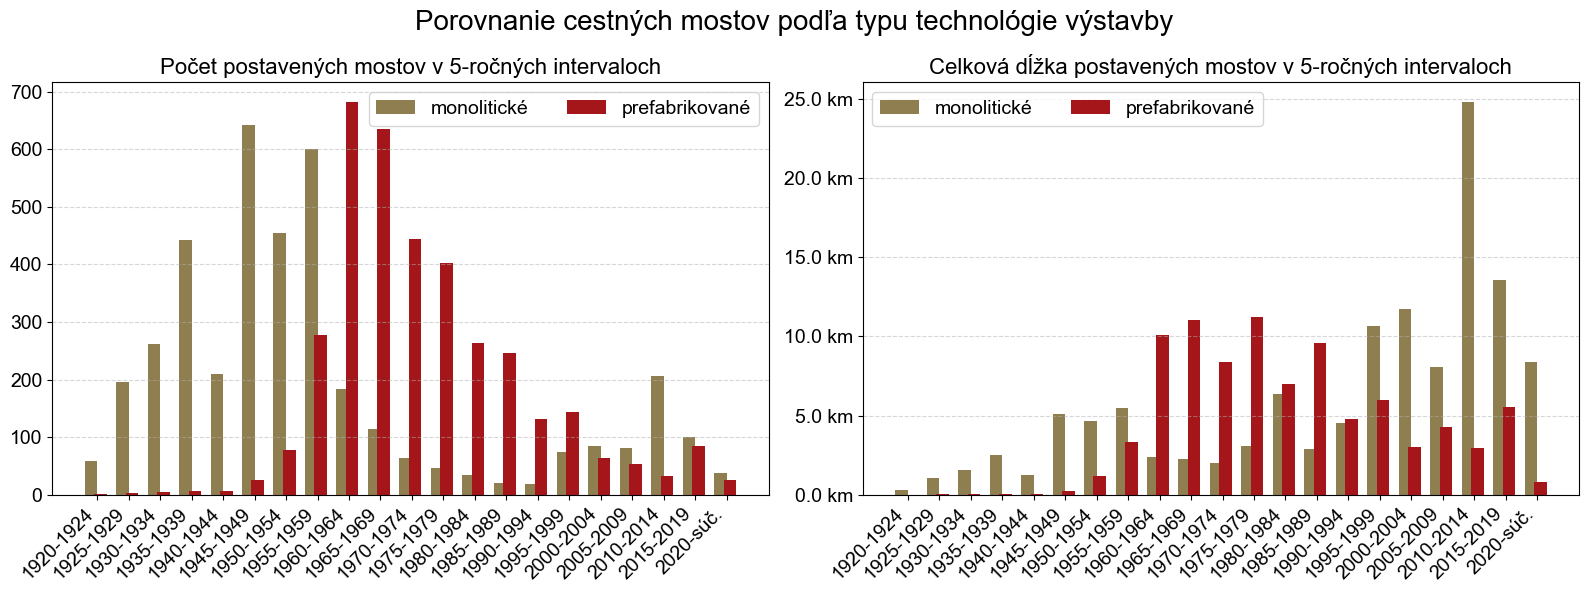

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick

# Set the language variable ("svk" or "en")
language = "svk"  # Change this to "en" for English captions

# Define the bin edges (years) and labels for the 5-year intervals
bin_value = 5
start_year = 1920
bin_edges = list(range(start_year, 2024, bin_value))
if bin_edges[-1] < 2023:
    bin_edges.append(bin_edges[-1] + bin_value)

bin_labels = [f'{start}-{start + (bin_value - 1)}' for start in bin_edges[:-1]]

if language == "svk":
    bin_label_append = "súč."
else:
    bin_label_append = "now"

# Replace the last 4 characters of the last bin_labels item with 4 spaces
bin_labels[-1] = bin_labels[-1][:-4] + bin_label_append

# Create a new column 'Construction Year Interval' based on the bins
df['Construction Year Interval'] = pd.cut(df['Rok postavenia'], bins=bin_edges, labels=bin_labels)

# Filter the DataFrame to include only "cast-in-place" and "precast" rows in the 'production' column
filtered_df = df[df['production'].isin(['cast-in-place', 'precast'])]

# Group the filtered DataFrame by 'Construction Year Interval' and 'production' and count the number of bridges in each group
bridge_counts = filtered_df.groupby(['Construction Year Interval', 'production']).size().unstack(fill_value=0)

# Group the filtered DataFrame by 'Construction Year Interval' and 'production' and sum the bridge lengths in each group
bridge_lengths = filtered_df.groupby(['Construction Year Interval', 'production'])['Dĺžka premostenia'].sum().unstack(fill_value=0)

# Get the unique construction years for positioning bars side by side
unique_years = bin_labels

# Define the width of each bar cluster
bar_width = 0.4

# Calculate the x-axis positions for bars of each category
x = np.arange(len(unique_years))

# Create a function to format y-axis ticks in kilometers
def format_kilometers(x, pos):
    return f'{x/1000:.1f} km'

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

if language == "svk":
    label_castinplace = "monolitické"
    label_precast = "prefabrikované"
else:
    label_castinplace = "cast-in-place"
    label_precast = "precast"

# Plot 1: Number of Cast-in-Place and Precast Bridges
bar_cast_in_place = ax1.bar(x - bar_width/2, bridge_counts['cast-in-place'], width=bar_width, label=label_castinplace, color='#8F7E4F')
bar_precast = ax1.bar(x + bar_width/4, bridge_counts['precast'], width=bar_width, label=label_precast, color='#A4161A')
if language == "svk":
    ax1.set_title(f'Počet postavených mostov v {bin_value}-ročných intervaloch', fontsize=16)
else:
    ax1.set_title(f'Number of Road Bridges Built in {bin_value}-Year Intervals', fontsize=16)
ax1.set_xticks(x)
ax1.set_xticklabels(unique_years, rotation=45, ha="right", fontsize=14)
ax1.legend(fontsize=14, ncols=2)
ax1.yaxis.set_tick_params(labelsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# Plot 2: Total Length of Cast-in-Place and Precast Bridges
bar_cast_in_place = ax2.bar(x - bar_width/2, bridge_lengths['cast-in-place'], width=bar_width, label=label_castinplace, color='#8F7E4F')
bar_precast = ax2.bar(x + bar_width/4, bridge_lengths['precast'], width=bar_width, label=label_precast, color='#A4161A')
if language == "svk":
    ax2.set_title(f'Celková dĺžka postavených mostov v {bin_value}-ročných intervaloch', fontsize=16)
else:
    ax2.set_title(f'Total Length of Road Bridges Built in {bin_value}-Year Intervals', fontsize=16)
ax2.set_xticks(x)
ax2.set_xticklabels(unique_years, rotation=45, ha="right", fontsize=14)
ax2.yaxis.set_major_formatter(mtick.FuncFormatter(format_kilometers))
ax2.yaxis.set_tick_params(labelsize=14)
ax2.legend(fontsize=14, ncols=2)
ax2.grid(axis='y', linestyle='--', alpha=0.5)

# Add a common title for the subplots
if language == "svk":
    plt.suptitle('Porovnanie cestných mostov podľa typu technológie výstavby', fontsize=20)
else:
    plt.suptitle('Comparison of Road Bridges according to the Type of Construction Technology', fontsize=20)

# Adjust spacing between subplots
plt.tight_layout()

# Save the plot as an SVG file
plt.savefig(f'by_construction_type_{language}.svg')

# Show the combined plot
plt.show()


#### Kumulatívne dĺžky

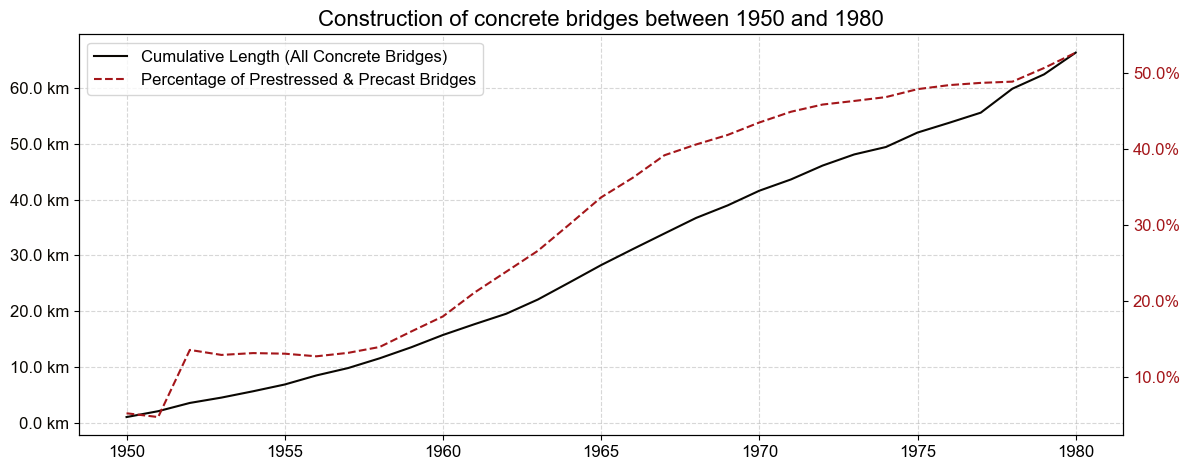

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mtick

language = "en"

start_year = 1950
end_year = 1980

all_concrete_bridges_df = df[(df["Rok postavenia"] >= start_year) &
                             (df["Rok postavenia"] <= end_year) &
                             (df['production'] != "other") &
                             (df['concrete'] != "other")]

prestressed_precast_bridges_df = df[(df["Rok postavenia"] >= start_year) &
                                    (df["Rok postavenia"] <= end_year) &
                                    (df['production'] == "precast") &
                                    (df['concrete'] == "prestressed")]

if language == "en":
    label_ax1 = 'Cumulative Length (All Concrete Bridges)'
    label_ax2 = 'Percentage of Prestressed & Precast Bridges'
    lan_title = f'Construction of concrete bridges between {start_year} and {end_year}'
else:
    label_ax1 = 'kumulatívna dĺžka (všetky betónové mosty)'
    label_ax2 = 'z toho prefabrikované predpäté mosty'
    lan_title = f'Výstavba betónových mostov v rokoch {start_year} až {end_year}'

# Calculate cumulative lengths for all concrete bridges
all_concrete_lengths = all_concrete_bridges_df.groupby('Rok postavenia')['Dĺžka premostenia'].sum().cumsum()

# Calculate cumulative length for prestressed precast bridges
prestressed_precast_lengths = prestressed_precast_bridges_df.groupby('Rok postavenia')['Dĺžka premostenia'].sum().cumsum()

# Calculate the percentage of prestressed precast bridges relative to the total length of concrete bridges
percentage_prestressed_precast = (prestressed_precast_lengths / all_concrete_lengths) * 100

# Create a figure with two Y-axes
h_ = 12
b_ = (h_/10)*4
fig, ax1 = plt.subplots(figsize=(h_, b_))

# Create the first Y-axis (left) for cumulative lengths of all concrete bridges
ax1.plot(all_concrete_lengths.index, all_concrete_lengths.values, label=label_ax1, linestyle='-', color='#0A0702')
ax1.tick_params(axis='y', labelcolor='#0A0702')
ax1.grid(True, linestyle='--', alpha=0.5)

# Create a function to format y-axis ticks in kilometers
def format_kilometers(x, pos):
    return f'{x/1000:.1f} km'

ax1.yaxis.set_major_formatter(mtick.FuncFormatter(format_kilometers))

# Create the second Y-axis (right) for the percentage of prestressed precast bridges
ax2 = ax1.twinx()  # Share the same x-axis
ax2.plot(percentage_prestressed_precast.index, percentage_prestressed_precast.values, label=label_ax2, linestyle='--', color='#A4161A')
ax2.tick_params(axis='y', labelcolor='#A4161A')

# Add suffix "%" to the second y-axis ticks
def format_percentage(x, pos):
    return f'{x:.1f}%'

ax2.yaxis.set_major_formatter(mtick.FuncFormatter(format_percentage))

# Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=45)

# Adjust font sizes
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.title(lan_title, fontsize=16)

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left', fontsize=12)

# Adjust spacing between subplots
plt.tight_layout()

# Save the plot as an SVG file
plt.savefig(f'cumulative_lenght_{language}.svg')

# Show the plot
plt.show()


In [21]:
prestressed_precast_bridges_df

,ID mosta,2012,2013,2014,2015,2016,2017,2018,2019,2020,...,n_2017,n_2018,n_2019,n_2020,n_2021,n_2022,n_2023,production,concrete,Construction Year Interval
1,M1979,Dobrý,Dobrý,Dobrý,Dobrý,Dobrý,Veľmi zlý,Veľmi zlý,Veľmi zlý,Veľmi zlý,...,6,6,6,6,6,6,6,precast,prestressed,1960-1964
2,M6525,Uspokojivý,Uspokojivý,Uspokojivý,Uspokojivý,Uspokojivý,Uspokojivý,Uspokojivý,Uspokojivý,Uspokojivý,...,4,4,4,4,4,4,4,precast,prestressed,1965-1969
12,M139,Uspokojivý,Uspokojivý,Uspokojivý,Uspokojivý,Uspokojivý,Uspokojivý,Uspokojivý,Uspokojivý,Uspokojivý,...,4,4,4,4,4,4,4,precast,prestressed,1975-1979
64,M349,Uspokojivý,Uspokojivý,Zlý,Zlý,Zlý,Zlý,Zlý,Zlý,Zlý,...,5,5,5,5,5,6,6,precast,prestressed,1970-1974
66,M4326,Zlý,Zlý,Zlý,Zlý,Zlý,Zlý,Zlý,Zlý,Uspokojivý,...,5,5,5,4,4,4,4,precast,prestressed,1965-1969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7587,M5429,Uspokojivý,Uspokojivý,Uspokojivý,Uspokojivý,Uspokojivý,Uspokojivý,Uspokojivý,Uspokojivý,Uspokojivý,...,4,4,4,4,4,4,4,precast,prestressed,1970-1974
7588,M4282,Uspokojivý,Uspokojivý,Uspokojivý,Uspokojivý,Uspokojivý,Uspokojivý,Uspokojivý,Uspokojivý,Uspokojivý,...,4,4,4,4,4,4,4,precast,prestressed,1970-1974
7589,M3396,Uspokojivý,Uspokojivý,Uspokojivý,Uspokojivý,Uspokojivý,Uspokojivý,Uspokojivý,Uspokojivý,Uspokojivý,...,4,4,4,4,4,4,2,precast,prestressed,1970-1974
7616,M5886,Zlý,Zlý,Zlý,Zlý,Zlý,Zlý,Zlý,Zlý,Zlý,...,5,5,5,5,5,5,3,precast,prestressed,1960-1964


In [22]:
# Filter the DataFrame to include bridges with a condition of 5 or above
condition_5_or_above_count = (prestressed_precast_bridges_df[prestressed_precast_bridges_df['n_2023'] >= 5])

bad_bridges = len(condition_5_or_above_count)
all_bridges = len(prestressed_precast_bridges_df)

# Print the count
print(f'Total number of bridges in category 5 or above: {bad_bridges}')
# Print the count
print(f'Total number of bridges: {all_bridges}')

print(f"bridges in category 5 or above are {bad_bridges/all_bridges}")

Total number of bridges in category 5 or above: 463
Total number of bridges: 1031
bridges in category 5 or above are 0.44907856450048494


In [23]:
condition_5_or_above_count["Kraj"].value_counts()

Kraj
Prešov             156
Košice              70
Banská Bystrica     69
Trnava              54
Žilina              48
Trenčín             31
Nitra               22
Bratislava          13
Name: count, dtype: int64

In [24]:
total_length_of_bridges = df["Dĺžka premostenia"].sum()
print(f'Total length of bridges: {total_length_of_bridges} meters')


Total length of bridges: 237464.52 meters


In [25]:
# Filter out rows where "Dĺžka premostenia" is not "Nezistený"
filtered_df = df[df['Dĺžka premostenia'] != 'Nezistený']

# Convert the "Dĺžka premostenia" column to float
filtered_df['Dĺžka premostenia'] = filtered_df['Dĺžka premostenia'].str.replace(',', '.', regex=True).astype(float)

# Calculate the total length of bridges
total_length = filtered_df['Dĺžka premostenia'].sum()

# Print the total length
print(f'Total length of bridges: {total_length} meters')


AttributeError: Can only use .str accessor with string values!

In [ ]:
30/237

0.12658227848101267